# 군집화 연습을 위한 데이터세트 생성

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=[0.7, 0.8, 0.9], random_state=123)

In [3]:
df = pd.DataFrame(columns={'component_1': X[0], 'component_2': X[1]}, data=X)
df['target'] = y
df.head()

,component_1,component_2,target
0,4.019954,-5.160994,0
1,3.765361,-5.314584,0
2,4.055068,-5.580596,0
3,3.920204,-0.775105,2
4,4.906131,-4.528468,0


<Axes: xlabel='component_1', ylabel='component_2'>

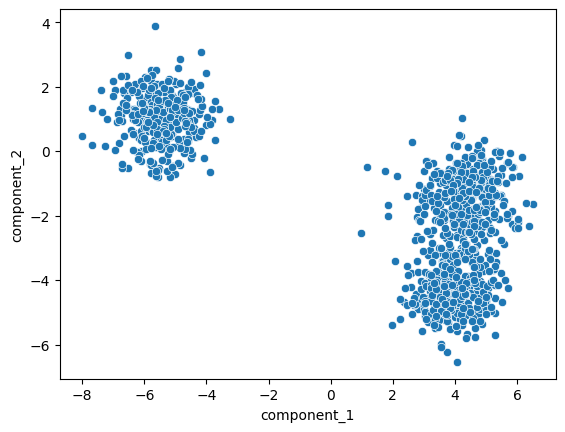

In [4]:
sns.scatterplot(data=df, x='component_1', y='component_2')

In [5]:
df['target'].value_counts()

target
0    334
2    333
1    333
Name: count, dtype: int64

# KMean Clustering

In [6]:
kmean = KMeans(n_clusters=3, max_iter=500, random_state=123)
pred_clusters = kmean.fit_predict(X)
df['kmean_pred_clusters'] = pred_clusters
df

,component_1,component_2,target,kmean_pred_clusters
0,4.019954,-5.160994,0,2
1,3.765361,-5.314584,0,2
2,4.055068,-5.580596,0,2
3,3.920204,-0.775105,2,0
4,4.906131,-4.528468,0,2
...,...,...,...,...
995,-5.589417,0.537549,1,1
996,-6.218882,-0.237752,1,1
997,3.755131,-0.775266,2,0
998,4.835535,-2.556632,2,0


In [7]:
kmean.cluster_centers_

array([[ 4.34159468, -1.39007504],
       [-5.48491634,  0.99812999],
       [ 3.9521037 , -4.25465879]])

<Axes: xlabel='component_1', ylabel='component_2'>

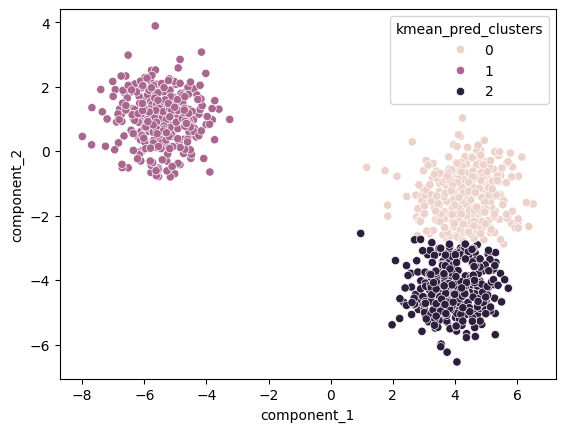

In [8]:
sns.scatterplot(data=df, x='component_1', y='component_2', hue='kmean_pred_clusters')

In [9]:
df.groupby('target')['kmean_pred_clusters'].value_counts()

target  kmean_pred_clusters
0       2                      330
        0                        4
1       1                      333
2       0                      311
        2                       22
Name: count, dtype: int64

# 군집평가 (Cluster Evaluation)
* silhouette_samples, silhouette_score

In [12]:
score_samples = silhouette_samples(X, df['kmean_pred_clusters'])
score_samples

array([ 0.68040382,  0.66604845,  0.63773061,  0.64848488,  0.61177344,
        0.67167577,  0.53583815,  0.82824046,  0.61335858,  0.70492443,
        0.27205012,  0.61222023,  0.6537361 ,  0.88239016,  0.90115974,
        0.87828246,  0.62898405,  0.55554329,  0.48866075,  0.39043396,
        0.67363573,  0.22263776,  0.6246776 ,  0.64670503,  0.19291976,
        0.88543936,  0.9037428 ,  0.04028583,  0.87930464,  0.29267581,
        0.60843892,  0.87686266,  0.3112074 ,  0.88092778,  0.71053844,
        0.84350196,  0.30737101,  0.63376695,  0.54193111,  0.37114447,
        0.75342723,  0.89930651,  0.8286795 ,  0.54075998,  0.31692759,
        0.89798027,  0.85132451,  0.61512681,  0.60959092,  0.58599642,
        0.39755163,  0.87396671,  0.43372345,  0.46483172,  0.71040082,
        0.4807332 ,  0.63657922,  0.70383603,  0.87939381,  0.9032234 ,
        0.37430959,  0.5907889 ,  0.8780942 ,  0.30948528,  0.80779412,
        0.63912367,  0.46266983,  0.57851893,  0.59144588,  0.46

In [14]:
df['silhouette_coeff'] = score_samples
df.head()

,component_1,component_2,target,kmean_pred_clusters,silhouette_coeff
0,4.019954,-5.160994,0,2,0.680404
1,3.765361,-5.314584,0,2,0.666048
2,4.055068,-5.580596,0,2,0.637731
3,3.920204,-0.775105,2,0,0.648485
4,4.906131,-4.528468,0,2,0.611773


In [15]:
average_score = silhouette_score(X, df['kmean_pred_clusters'])
average_score

0.6479517975491353

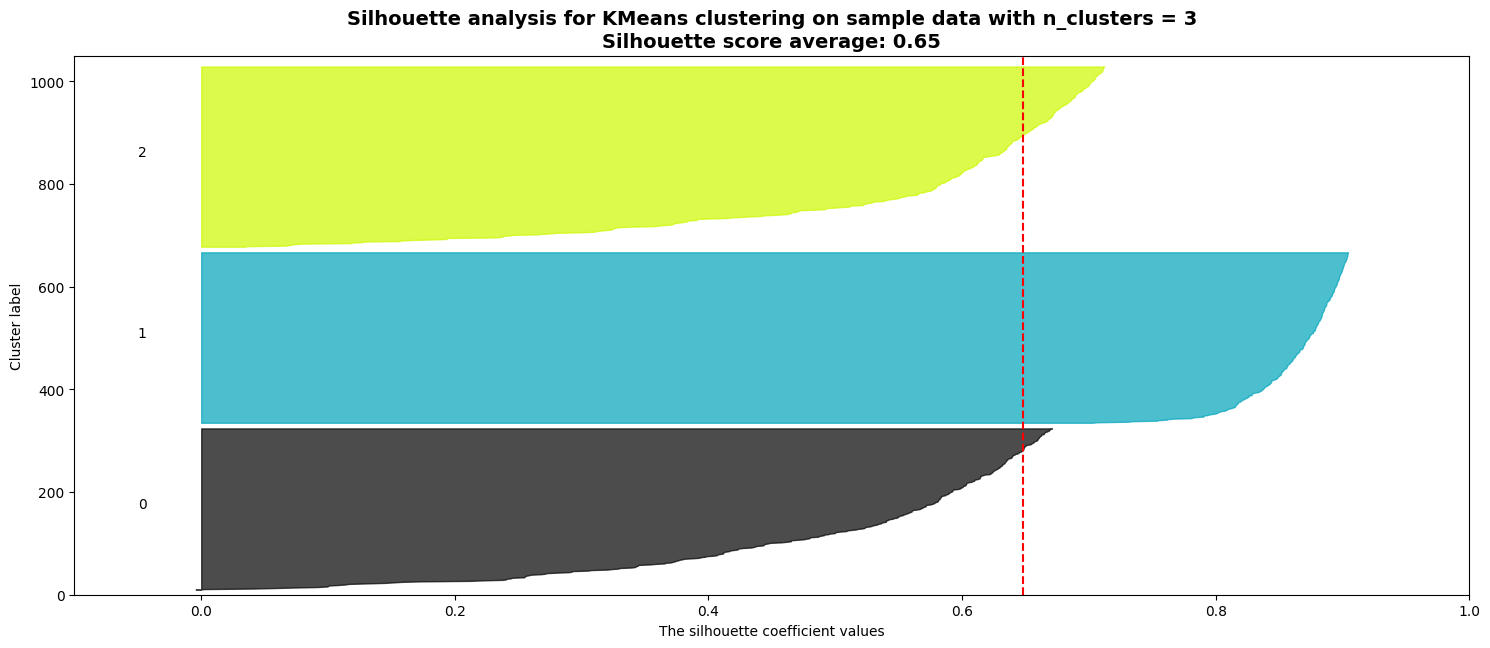

In [30]:
# Create a subplot with 1 row and 1 column
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The silhouette plot ranges from -1 to 1
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
ax1.set_ylim([0, len(X) + (4 + 1) * 10])


y_lower = 10
for i in range(3): 
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = score_samples[pred_clusters == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples


ax1.axvline(x=average_score, color="red", linestyle="--")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.title(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = 3\n"
          f"Silhouette score average: {average_score:.2f}", fontsize=14, fontweight='bold')
plt.show()
